# Digital Image Processing<br> Problem 3<br> Felix Neutatz

##Filtering in frequency domain

In [4]:
%matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from functools import partial

In [6]:
def plotGreyImage(imageToPlot, title):
    plt.imshow(imageToPlot, cmap='gray') #Greys_r
    plt.title(title)
    plt.axis('off')
    plt.show()

In [8]:
def processing(image):
    for x in range (image.shape[0]):
        for y in range (image.shape[1]):
            image[x,y] = image[x,y] * ((-1)**(x + y))
    return image

In [9]:
def zero_padding(img, pixels):
    padding = np.zeros((img.shape[0] + pixels*2, img.shape[1] + pixels*2))
    
    padding[pixels:(img.shape[0]+pixels),pixels:(img.shape[1]+pixels)] = img
    
    return padding

In [10]:
def crop_image(img, pixels):
    return(img[ pixels:(img.shape[0]-pixels),pixels:(img.shape[1]-pixels) ])

In [11]:
def ideal_lowpass(d, D0):
    if float(d) > D0:
        return 0.0
    else:
        return 1.0

In [12]:
def ideal_highpass(d, D0):
    if float(d) < D0:
        return 0.0
    else:
        return 1.0

In [13]:
def butterworth_lowpass(d, D0, n):
    return (1 / (1 + (float(d) / D0)**(2 * n)))

In [14]:
def butterworth_highpass(d, D0, n):    
            if (d == 0):
                return 0.0
            else:            
                return (1 / (1 + (D0 / float(d))**(2 * n))) #problem d can be zero!!

In [15]:
def gaussian_lowpass(d, D0):
    return (np.exp(-(float(d) ** 2) / (2 * (D0 ** 2))))

In [16]:
def gaussian_highpass(d, D0):
    return (1 - np.exp(-(float(d) ** 2) / (2 * (D0 ** 2))))

In [47]:
def filter_Function(ff, function):
    matrix = ff.copy()
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            d = np.sqrt((x - int(matrix.shape[0]/2)) ** 2 + (y - int(matrix.shape[1]/2)) ** 2)
            matrix[x,y] = matrix[x,y] * function(d)
    
    return matrix

In [1]:
def filterFrequency(imageName, ffunction):
    img = mpimg.imread(imageName)
    
    pad = zero_padding(img,1)
    
    preprocessed = processing(pad)
    
    newImage = np.fft.fft2(preprocessed)
    
    filtered = filter_Function(ff = newImage, function = ffunction)
    
    result = np.fft.ifft2(filtered)
    
    postprocessed = processing(result.real)
    
    cropped = crop_image (postprocessed,1)
    
    return cropped
    

In [19]:
def test_filter(function, name, test_size = 500):
    test_image = np.ones((test_size,test_size)) * 255
    test_result = filter_Function(test_image, partial(function))
    plotGreyImage(np.abs(test_result), name)

    data = np.arange(0,test_size,1)
    test_plt = [0.0] * len(data)
    for i in range(len(data)):
        test_plt[i] = function(data[i])
    plt.plot(test_plt)
    plt.show

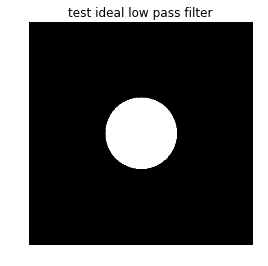

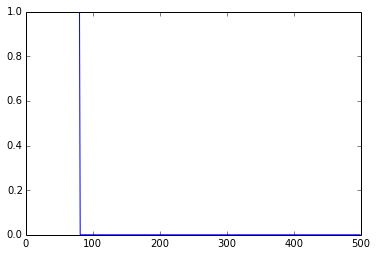

In [20]:
test_filter(partial(ideal_lowpass, D0 = 80), "test ideal low pass filter")

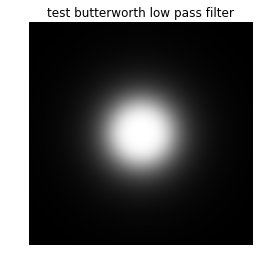

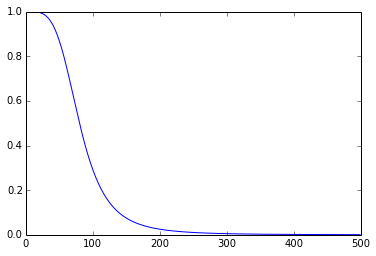

In [21]:
test_filter(partial(butterworth_lowpass, D0 = 80, n = 2), "test butterworth low pass filter")

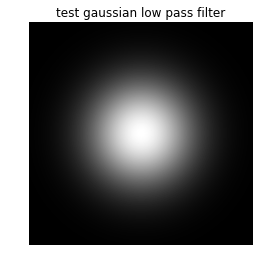

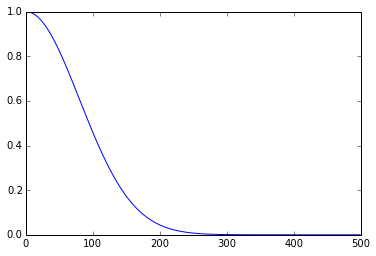

In [22]:
test_filter(partial(gaussian_lowpass, D0 = 80), "test gaussian low pass filter")

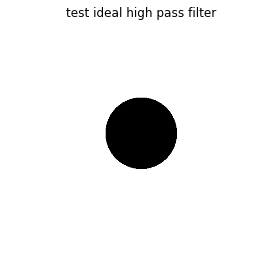

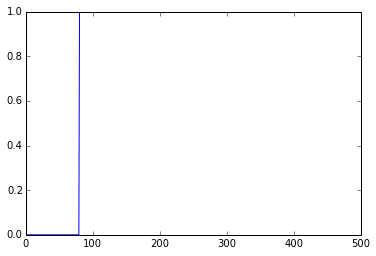

In [23]:
test_filter(partial(ideal_highpass, D0 = 80), "test ideal high pass filter")

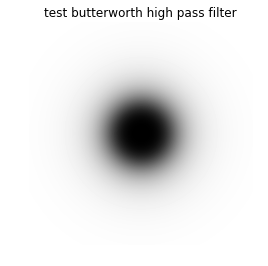

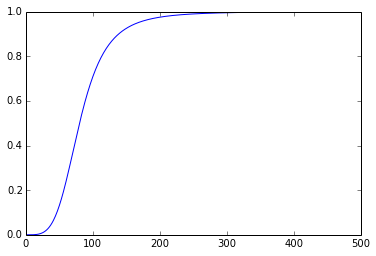

In [24]:
test_filter(partial(butterworth_highpass, D0 = 80, n = 2), "test butterworth high pass filter")


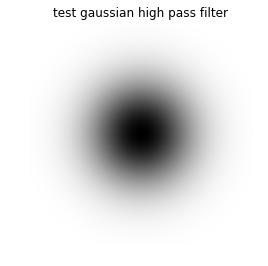

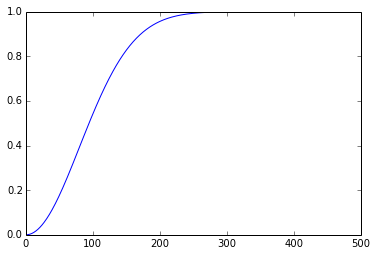

In [25]:
test_filter(partial(gaussian_highpass, D0 = 80), "test gaussian high pass filter")

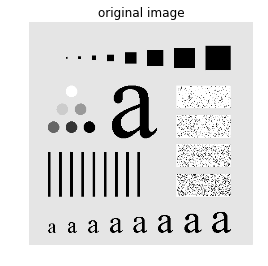

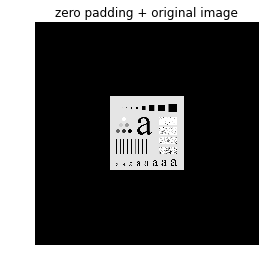

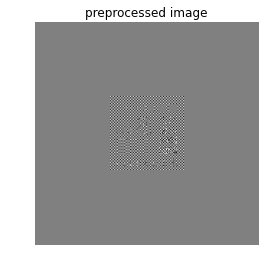

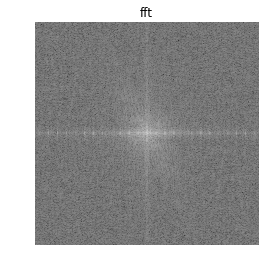

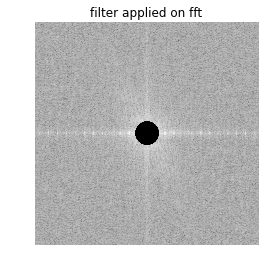

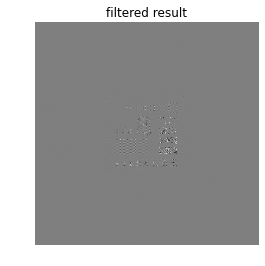

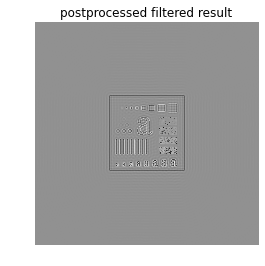

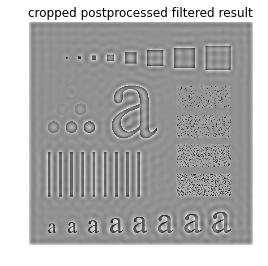

In [48]:
imageName = 'characters_test_pattern.tif'
img = mpimg.imread(imageName)
plotGreyImage(img, "original image")

pad = zero_padding(img)
plotGreyImage(pad, "zero padding + original image")

preprocessed = processing(pad)
plotGreyImage(preprocessed, "preprocessed image")

newImage = np.fft.fft2(preprocessed)
plotGreyImage(np.log(np.abs(newImage)), "fft")

#radius = 5
#filtered = idealFilter_lowpass(newImage, radius)
#plotGreyImage(idealFilter_lowpass(np.log(np.abs(newImage)),radius), "filter applied on fft")

#D0 = 15
#n = 2
#filtered = butterworthFilter_lowpass(newImage, D0, n)
#plotGreyImage(butterworthFilter_lowpass(np.log(np.abs(newImage)), D0, n), "filter applied on fft")

filterT = partial(ideal_highpass, D0 = 80)

filtered = filter_Function(newImage, filterT)
plotGreyImage(filter_Function(np.log(np.abs(newImage)), filterT), "filter applied on fft")

result = np.fft.ifft2(filtered)
plotGreyImage(result.real, "filtered result")

postprocessed = processing(result.real)
plotGreyImage(postprocessed, "postprocessed filtered result")

cropped = crop_image (postprocessed)
plotGreyImage(cropped, "cropped postprocessed filtered result")

Results of ideal lowpass filtering  with cut-off frequencies set at radii values 5, 15 and 30


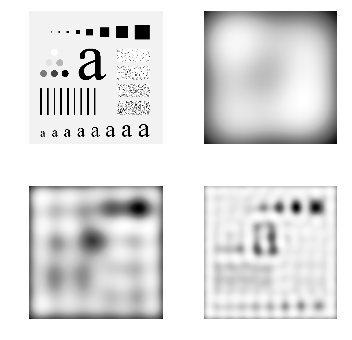

In [44]:
print "Results of ideal lowpass filtering  with cut-off frequencies set at radii values 5, 15 and 30"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')


filterfunction = partial(ideal_lowpass, D0 = 5)
ideal5 = filterFrequency(imageName, filterfunction)
ax2.imshow(ideal5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(ideal_lowpass, D0 = 15)
ideal15 = filterFrequency(imageName, filterfunction)
ax3.imshow(ideal15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(ideal_lowpass, D0 = 30)
ideal30 = filterFrequency(imageName, filterfunction)
ax4.imshow(ideal30, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

Results of Butterworth lowpass filtering of order 2 with cut-off frequencies set at radii values 5, 15 and 30


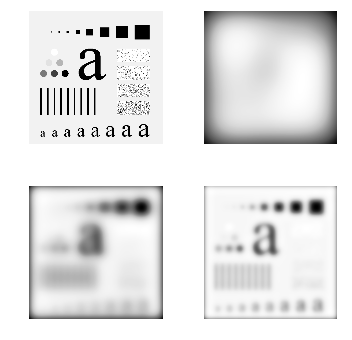

In [30]:
print "Results of Butterworth lowpass filtering of order 2 with cut-off frequencies set at radii values 5, 15 and 30"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')

filterfunction = partial(butterworth_lowpass, D0 = 5, n = 2)
butterworth5 = filterFrequency(imageName, filterfunction)
ax2.imshow(butterworth5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(butterworth_lowpass, D0 = 15, n = 2)
butterworth15 = filterFrequency(imageName, filterfunction)
ax3.imshow(butterworth15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(butterworth_lowpass, D0 = 30, n = 2)
butterworth30 = filterFrequency(imageName, filterfunction)
ax4.imshow(butterworth30, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

Results of Gaussian lowpass filtering with cut-off frequencies set at radii values 5, 15 and 30


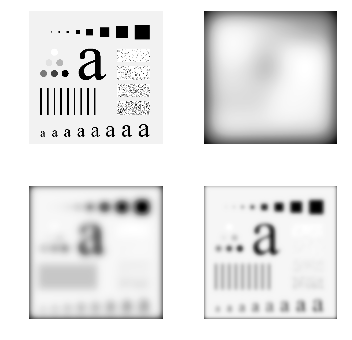

In [31]:
print "Results of Gaussian lowpass filtering with cut-off frequencies set at radii values 5, 15 and 30"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')

filterfunction = partial(gaussian_lowpass, D0 = 5)
gaussian5 = filterFrequency(imageName, filterfunction)
ax2.imshow(gaussian5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(gaussian_lowpass, D0 = 15)
gaussian15 = filterFrequency(imageName, filterfunction)
ax3.imshow(gaussian15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(gaussian_lowpass, D0 = 30)
gaussian30 = filterFrequency(imageName, filterfunction)
ax4.imshow(gaussian30, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

Results of ideal highpass filtering  with cut-off frequencies set at radii values 5, 15 and 80


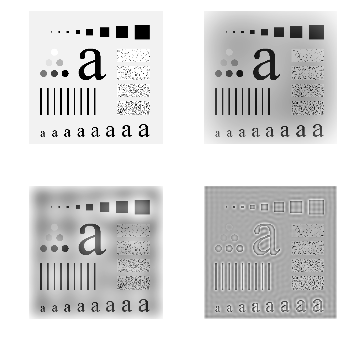

In [32]:
print "Results of ideal highpass filtering  with cut-off frequencies set at radii values 5, 15 and 80"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')

filterfunction = partial(ideal_highpass, D0 = 5)
ideal5 = filterFrequency(imageName, filterfunction)
ax2.imshow(ideal5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(ideal_highpass, D0 = 15)
ideal15 = filterFrequency(imageName, filterfunction)
ax3.imshow(ideal15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(ideal_highpass, D0 = 80)
ideal80 = filterFrequency(imageName, filterfunction)
ax4.imshow(ideal80, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

Results of Butterworth highpass filtering of order 2 with cut-off frequencies set at radii values 5, 15 and 80


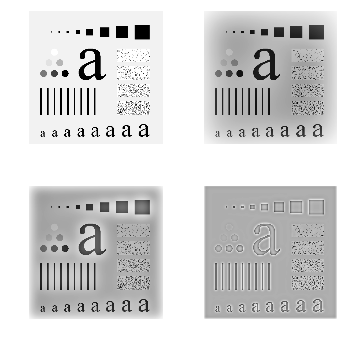

In [33]:
print "Results of Butterworth highpass filtering of order 2 with cut-off frequencies set at radii values 5, 15 and 80"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')

filterfunction = partial(butterworth_highpass, D0 = 5, n = 2)
butterworth5 = filterFrequency(imageName, filterfunction)
ax2.imshow(butterworth5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(butterworth_highpass, D0 = 15, n = 2)
butterworth15 = filterFrequency(imageName, filterfunction)
ax3.imshow(butterworth15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(butterworth_highpass, D0 = 80, n = 2)
butterworth80 = filterFrequency(imageName, filterfunction)
ax4.imshow(butterworth80, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()

Results of Gaussian highpass filtering with cut-off frequencies set at radii values 5, 15 and 80


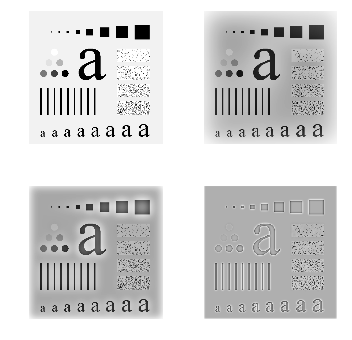

In [34]:
print "Results of Gaussian highpass filtering with cut-off frequencies set at radii values 5, 15 and 80"

imageName = 'characters_test_pattern.tif'

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

fig.set_figheight(5)
fig.set_figwidth(5)

img = mpimg.imread(imageName)
ax1.imshow(img, cmap='Greys_r')
ax1.axis('off')

filterfunction = partial(gaussian_highpass, D0 = 5)
gaussian5 = filterFrequency(imageName, filterfunction)
ax2.imshow(gaussian5, cmap='Greys_r')
ax2.axis('off')

filterfunction = partial(gaussian_highpass, D0 = 15)
gaussian15 = filterFrequency(imageName, filterfunction)
ax3.imshow(gaussian15, cmap='Greys_r')
ax3.axis('off')

filterfunction = partial(gaussian_highpass, D0 = 80)
gaussian80 = filterFrequency(imageName, filterfunction)
ax4.imshow(gaussian80, cmap='Greys_r')
ax4.axis('off')

plt.tight_layout()
plt.show()